# Applied Statistics - Tasks

**Author: Cecilia Pastore**

---

## **Table of content** <a class="anchor" id="Table_of_content"></a>


* [Introduction](#Introduction)
* [Task 1: Permutations and Combinations](#task1)
    * [1.1 Import the needed libraries for the project)](#1_1)
    * [1.2 CO2](#1_2)
        * [1.2.1 CO2 - Bereiter et al. (2014)](#1_2_1)
        * [1.2.2 CO2 - Luthi et al (2008)](#1_2_2)
        * [1.2.3 Comparing the datasets](#1_2_3)
        * [1.2.4 Fusing the dataset on recent years and export on CSV/JASON](#1_2_4)        
    * [1.3 Temprature Anomaly](#1_3)
        * [1.3.1 - Jouzel dataset](#1_3_1)
        * [1.3.2 - NOAA_temperature](#1_3_2)
        * [1.3.3 Comparing the dataset](#1_3_3)
        * [1.3.4 Adding the recent years](#1_3_4)
        * [1.3.5 Fuse the temperature dataset and export to csv/jason](#1_3_5)
    * [1.4 CH4](#1_4)
        * [1.4.1 From 800,000 years before present to 1000](#1_4_1)
        * [1.4.2 From 1000 to 1984](#1_4_2)
        * [1.4.3 From 1984 to 2022](#1_4_3)
        * [1.4.4 Fuse the dataset and export it as CSV and Jason](#1_4_4)
    * [1.5 Fuse the dataset](#1_5)
    * [1.6 CO2/CH4/Temp_anomaly Analysis](#1_6)
        * [1.6.1 CO2](#1_6_1)
        * [1.6.2 Temperature anomaly](#1_6_2)
        * [1.6.3 CH4](#1_6_3)
        * [1.6.4 CO2/CH4/Temp anomality - combined analysis](#1_6_4)
    * [1.7 Prediction](#1_7)
* [Conclusion Part 1: Temperature Anomaly/C02/CH4](#Conclusion1)
* [Part 2: IRISH contest: temperature and rainfall](#part2)
    * [2.1 Import, Manipulate, and Adapt the Rainfall Dataset, and Export as CSV/JSON](#2_1)
    * [2.2 Import, Manipulate, and Adapt the temperature dataset and Export as CSV/JSON](#2_2)
    * [2.3 Fuse the temperature/rainfall dataset and export it as CSV/JSON](#2_3)

    * [2.4 Irish contest analysis](#2_4)
        * [2.4.1 Rainfall/Rainfall anomaly in Ireland](#2_4_1)
        * [2.4.2 Temperature/Temperature anomaly in Ireland](#2_4_2)
        * [2.4.3 Temperature and rainfall in Ireland](#2_4_3)
* [Conclusion On Part 2: Rainfall and temperature in Ireland](#Conclusion2)
* [References](#References)


#### **INTRODUCTION** <a class="anchor" id="Introduction"></a>

The following project has been formulated as Project Number Two for the subject 'Programming for Data Analysis' at Atlantic Technological University, Galway. The project assignment can be reviewed below before delving into the project itself.

### **Task 1: Permutations and Combinations** <a class="anchor" id="task1"></a>

---

**Task assignement**

>Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.
>
>Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.
>
>Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.
>
>Would you accept two errors? Explain.

First, we can import the necessary library.

In [20]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# print in tabulate format 
# https://pypi.org/project/tabulate/
from tabulate import tabulate

We define the variables needed to explore the problem: the total number of cups, the number of cups with milk added first, and the number of cups with tea added first.

In [2]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 6

# Number of cups of tea with tea in first.
no_cups_tea_first = 6

We can calculates the number of ways to select six cups (in this case cups with milk first) from a total of twelve using the math.comb formula (https://docs.python.org/3/library/math.html#math.comb).

In [3]:
# Number of ways of selecting four cups from eight.
ways = math.comb(no_cups, no_cups_milk_first)

# Show.
ways

924

In [5]:
# The cup labels.
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [6]:
# Select four cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 6)

# Sort, inplace.
labels_milk.sort()

In [7]:
# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{2, 4, 6, 8, 9, 10}

In [8]:
# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea.
combs = list(itertools.combinations(labels, no_cups_milk_first))

In [12]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))
  
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Extract the counts into a separate array
overlap_counts = counts[1]  # Array containing the counts

# Print the results
print(counts)

(array([0, 1, 2, 3, 4, 5, 6]), array([  1,  36, 225, 400, 225,  36,   1], dtype=int64))


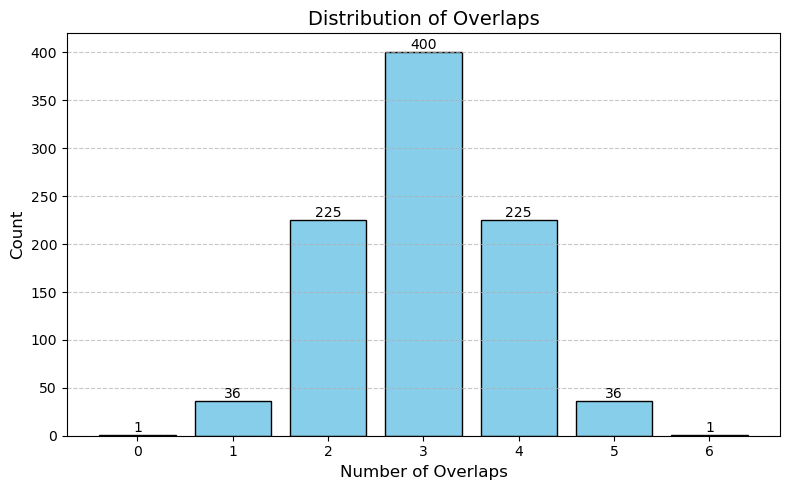

In [14]:
# Plotting the Numberso of possible overlapping
# source: https://how2matplotlib.com/how-to-annotate-bars-in-barplot-with-matplotlib.html


# Create a figure.
fig, ax = plt.subplots(figsize=(8, 5))

# Bar chart with custom colors.
bars = ax.bar(counts[0], counts[1], color='skyblue', edgecolor='black')

# Add percentage labels above the bars.
# https://realpython.com/python-zip-function/
for bar, count in zip(bars, counts[1]):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{count}', ha='center', va='bottom')  # Corrected this line

# Add labels and title.
ax.set_xlabel('Number of Overlaps', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of Overlaps', fontsize=14)
ax.set_xticks(counts[0])  # Ensure all x-tick labels are displayed
ax.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal grid lines

# Show the plot.
plt.tight_layout()  # Optimize layout
plt.show()

In [18]:
# Calculate cumulative probabilities for each number of cups with milk to be randomly selected 

# Initialize an array to store the number of overlaps and their probabilities
selection_probability = []
cumulative_overlapping = 0
number_of_cups = 6

# Calculate probabilities and store results in reverse order
# Source: https://www.w3schools.com/python/ref_func_reversed.asp
for i in reversed(overlap_counts):  # Loop through the array in reverse
    cumulative_overlapping += i  # Update cumulative overlap count
    probability_cups_with_milk = cumulative_overlapping / ways  # Calculate probability
    selection_probability.append((number_of_cups, cumulative_overlapping, probability_cups_with_milk))  # Store as a tuple (count, probability)
    number_of_cups -= 1  # Decrease the cup count

# using tabulate to print the result in a readable format 
# https://pypi.org/project/tabulate/
# https://www.geeksforgeeks.org/printing-lists-as-tabular-data-in-python/

# Prepare data for tabulate
headers = ["Number of Cups", "Cumulative Overlaps", "Probability (%)"]
table = [(num_cups, cum_overlaps, f"{prob * 100:.2f}") for num_cups, cum_overlaps, prob in selection_probability]

# Print the results using tabulate
print(tabulate(table, headers=headers, tablefmt="rst"))


================  =====================  =================
  Number of Cups    Cumulative Overlaps    Probability (%)
================  =====================  =================
               6                      1               0.11
               5                     37               4
               4                    262              28.35
               3                    662              71.65
               2                    887              96
               1                    923              99.89
               0                    924             100
================  =====================  =================


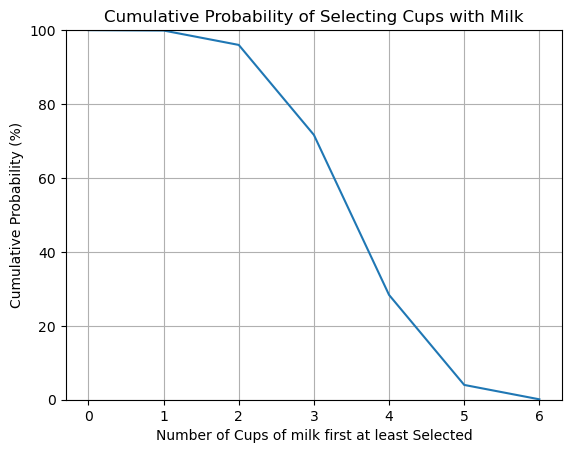

In [23]:
# Unpack the selection_probability list into separate lists
num_cups_list, cumulative_overlaps, probabilities = zip(*selection_probability)

# Convert probabilities to percentages for display purposes only (do not use for plotting)
probabilities_percentage = [prob * 100 for prob in probabilities]

# Plotting
plt.plot(num_cups_list, probabilities_percentage)
plt.title('Cumulative Probability of Selecting Cups with Milk')
plt.xlabel('Number of Cups of milk first at least Selected')
plt.ylabel('Cumulative Probability (%)')  # Update the ylabel to indicate percentage
plt.xticks(num_cups_list)  # Set x-ticks to the number of cups
plt.grid()
plt.ylim(0, 100)  # Set y-axis limits to show percentage range
plt.show()


site consulted 

https://docs.python.org/3/library/itertools.html#itertools.combinations
